In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
glass = pd.read_csv('glass.csv')

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# EDA

In [ ]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
glass.isnull().value_counts()

RI     Na     Mg     Al     Si     K      Ca     Ba     Fe     Type 
False  False  False  False  False  False  False  False  False  False    214
dtype: int64

In [ ]:
def nans(df): return df[df.isnull().any(axis=1)]

In [ ]:
nans(glass)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [ ]:
glass.duplicated().value_counts()

False    213
True       1
dtype: int64

In [ ]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass.iloc[38:40,:]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass.drop_duplicates(inplace=True)

# Visualizing The features

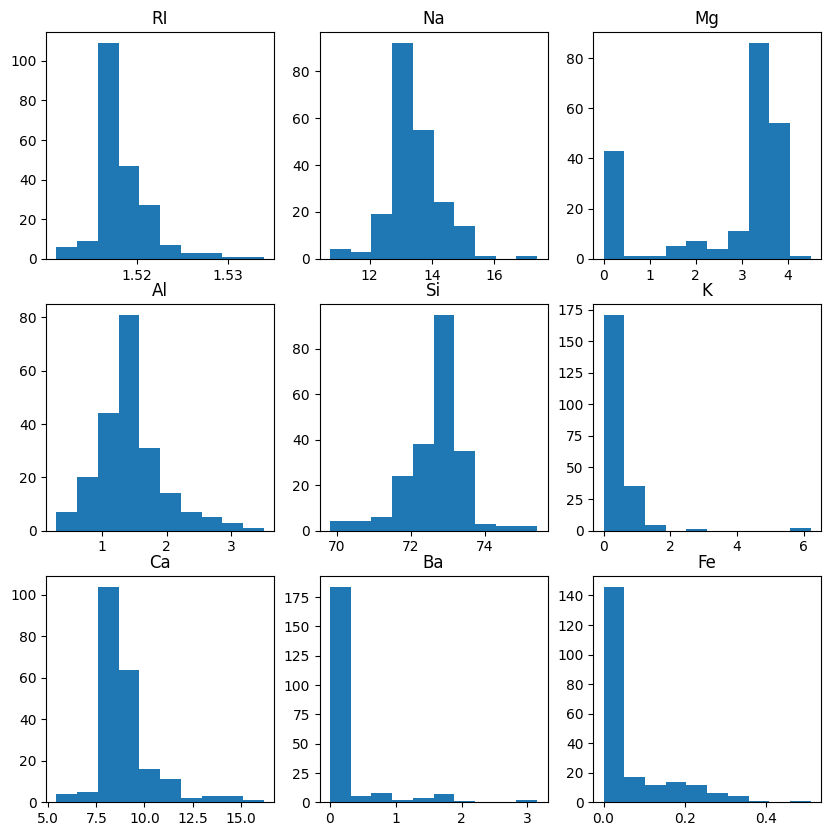

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(10,10))
axs[0][0].hist(glass["RI"])
axs[0][0].set_title("RI")
axs[0][1].hist(glass["Na"])
axs[0][1].set_title("Na")
axs[0][2].hist((glass["Mg"]))
axs[0][2].set_title("Mg")
axs[1][0].hist(glass["Al"])
axs[1][0].set_title("Al")
axs[1][1].hist((glass["Si"]))
axs[1][1].set_title("Si")
axs[1][2].hist(glass["K"])
axs[1][2].set_title("K")
axs[2][0].hist((glass["Ca"]))
axs[2][0].set_title("Ca")
axs[2][1].hist(glass["Ba"])
axs[2][1].set_title("Ba")
axs[2][2].hist(glass["Fe"])
axs[2][2].set_title("Fe")
plt.show()

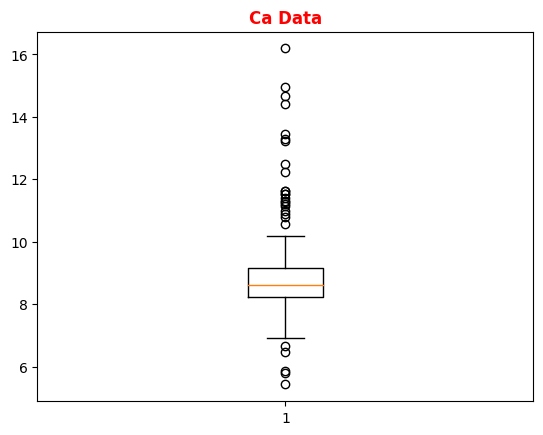

In [ ]:
plt.boxplot((glass["Ca"]))
plt.title("Ca Data", color="red", fontweight="bold")
plt.show()

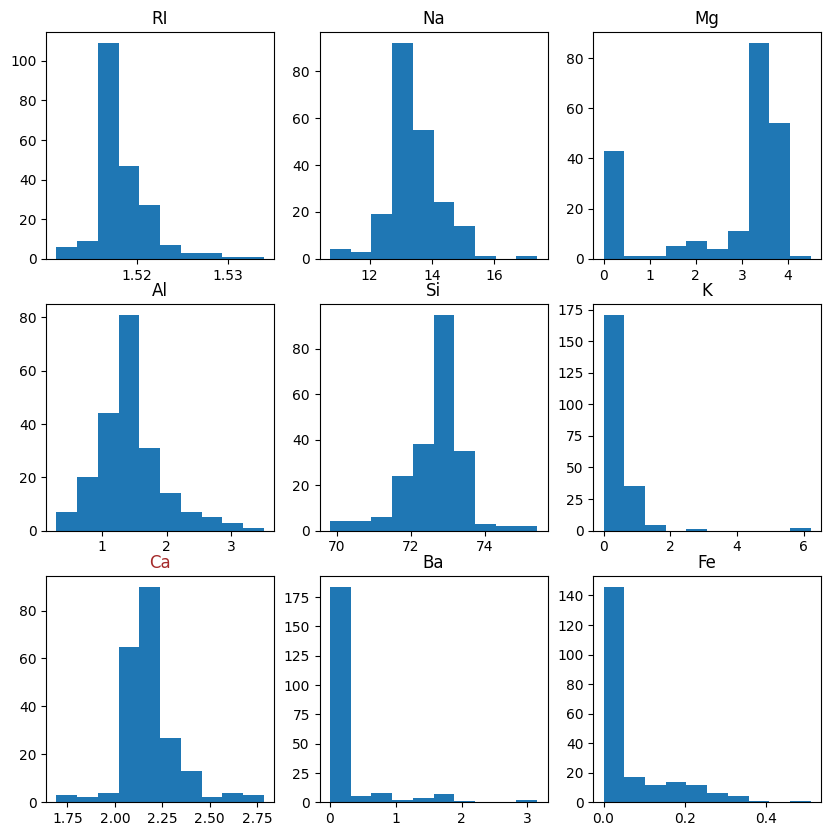

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(10,10))
axs[0][0].hist((glass["RI"]))
axs[0][0].set_title("RI")
axs[0][1].hist(glass["Na"])
axs[0][1].set_title("Na")
axs[0][2].hist((glass["Mg"]))
axs[0][2].set_title("Mg")
axs[1][0].hist((glass["Al"]))
axs[1][0].set_title("Al")
axs[1][1].hist((glass["Si"]))
axs[1][1].set_title("Si")
axs[1][2].hist(glass["K"])
axs[1][2].set_title("K")
axs[2][0].hist(np.log(glass["Ca"]))
axs[2][0].set_title("Ca",color='brown')
axs[2][1].hist(glass["Ba"])
axs[2][1].set_title("Ba")
axs[2][2].hist((glass["Fe"]))
axs[2][2].set_title("Fe")
plt.show()

# Feature transformation for Ca column

In [ ]:
glass["Ca"]=np.log(glass["Ca"])

In [ ]:
fig=px.scatter(glass.iloc[:,0:9],symbol = glass["Type"])
fig.update_layout(title="glass Data")
fig.show()

In [ ]:
fig = px.scatter_matrix(glass, dimensions = glass.columns[:-1], color="Type")
fig.update_layout(title = "glass Data")
fig.show()

In [ ]:
glass[glass["Type"]==3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
146,1.51769,13.65,3.66,1.11,72.77,0.11,2.151762,0.00,0.00,3
147,1.51610,13.33,3.53,1.34,72.67,0.56,2.119863,0.00,0.00,3
148,1.51670,13.24,3.57,1.38,72.70,0.56,2.132982,0.00,0.10,3
149,1.51643,12.16,3.52,1.35,72.89,0.57,2.143589,0.00,0.00,3
150,1.51665,13.14,3.45,1.76,72.48,0.60,2.125848,0.00,0.17,3
151,1.52127,14.32,3.90,0.83,71.50,0.00,2.250239,0.00,0.00,3
152,1.51779,13.64,3.65,0.65,73.00,0.06,2.189416,0.00,0.00,3
153,1.51610,13.42,3.40,1.22,72.69,0.59,2.118662,0.00,0.00,3
154,1.51694,12.86,3.58,1.31,72.61,0.61,2.173615,0.00,0.00,3
155,1.51646,13.04,3.40,1.26,73.01,0.52,2.149434,0.00,0.00,3


In [ ]:
glass[glass["Type"]==5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
163,1.51514,14.01,2.68,3.50,69.89,1.68,1.769855,2.20,0.00,5
164,1.51915,12.73,1.85,1.86,72.69,0.60,2.311545,0.00,0.00,5
165,1.52171,11.56,1.88,1.56,72.86,0.47,2.434490,0.00,0.00,5
166,1.52151,11.03,1.71,1.56,73.44,0.58,2.452728,0.00,0.00,5
167,1.51969,12.64,0.00,1.65,73.75,0.38,2.444952,0.00,0.00,5
168,1.51666,12.86,0.00,1.83,73.88,0.97,2.319442,0.00,0.00,5
169,1.51994,13.27,0.00,1.76,73.03,0.47,2.426571,0.00,0.00,5
170,1.52369,13.44,0.00,1.58,72.22,0.32,2.504709,0.00,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,1.940179,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,1.935860,0.00,0.00,5


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,2.181142,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,0.144324,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,1.691939,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,2.109000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,2.151762,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,2.213754,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,2.784394,3.150000,0.510000,7.000000


# Train-Test Split

In [ ]:
X=glass.iloc[:,0:9]
Y=glass.iloc[:,9]

In [ ]:
Y.unique()

array([1, 2, 3, 5, 6, 7])

# Standard Scaler

In [ ]:
Scale = StandardScaler()
scaled_data=Scale.fit_transform(X)

In [ ]:
scaled_data

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.0839564 ,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.85550294,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.89999485,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.33447813,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.30164042,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.18791589,
         3.00585377, -0.58830108]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# KNN Model

In [ ]:
score=[]
for i in range(2,50,2):
    KNN=KNeighborsClassifier(n_neighbors=i,p=1,metric="minkowski")
    KNN.fit(X_train,Y_train)
    predict=KNN.predict(X_test)
    score.append(accuracy_score(Y_test,predict))

# Visualizing KNN

In [ ]:
fig3=px.bar(x=range(2,50,2),y=score)
fig3.update_layout(title = "KNN Accuracy for different Models", xaxis_title="Nerest neighbors", yaxis_title="Score")
fig3.show()

# Final Model with neighbors = 4

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 4,p = 1, metric = "minkowski")
Final_model=KNN.fit(X_train,Y_train)
predict=Final_model.predict(X_test)
accuracy=accuracy_score(predict,Y_test)
print("Accuracy Score is:",accuracy)
print("==="*20)
print(classification_report(predict,Y_test))

Accuracy Score is: 0.6976744186046512
              precision    recall  f1-score   support

           1       1.00      0.59      0.74        17
           2       0.60      0.64      0.62        14
           3       0.33      1.00      0.50         1
           5       0.67      0.67      0.67         3
           6       0.33      1.00      0.50         1
           7       0.78      1.00      0.88         7

    accuracy                           0.70        43
   macro avg       0.62      0.82      0.65        43
weighted avg       0.78      0.70      0.71        43



# Visualize Using TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
A=glass.iloc[:,0:9]
B=glass.iloc[:,9]

In [ ]:
visual_data = TSNE(n_components=2).fit_transform(A)

In [ ]:
px.scatter(visual_data, color = glass["Type"])